# Best Neighborhood According to the Number of Pools and Drinking Fountains

#### April Rigot

The goal of this project is to present a measurement that helps me to determine what the best neighborhood in Pittburgh is. Originally I considered focusing on crime, but the dataset did not provide me a way to filter out the nonviolent crimes. Using the Western Pennsylvania Regional Data Center, I ultimately determined that the best neighborhood would have to have at least one pool, because of the summer heat. Since the data set for City of Pittsburgh Pools was very limited, I decided that it is also important to have water fountains so that people don't pass out. Both datasets included the sprayparks, so I had to filter the Water Features dataset to only include water fountains to avoid overlapping data.

I decided that the best neighborhood is the neighborhood with the most pools, spray parks and drinking fountains. Pools and spray parks keep people cool in the summer while drinking fountains keep you hydrated. To be the best neighborhood, it must have at least one pool or one spray park, which had immediatly eliminated most neighborhoods in Pittsburgh. The two datasets I used were the [City of Pittsburgh Pools](https://data.wprdc.org/dataset/city-pools) dataset and the [City of Pittsburgh Water Features](https://data.wprdc.org/dataset/city-water-features) dataset. The City of Pittsburgh Pools dataset I renamed Pools and the City of Pittsburgh Water Features I shorted to Waterfeatures when I downloaded them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#creating datasets and specifying what columns to use
pools = pd.read_csv("Pools.csv",
                    usecols = ["type", "neighborhood"],
                    index_col="neighborhood", 
    parse_dates=True)

fountains = pd.read_csv("Waterfeatures.csv",
                    usecols = ["feature_type", "neighborhood"],
                    index_col="neighborhood", 
    parse_dates=True,)
#filtering the fountains dataset to specify Drinking fountains
fountains = fountains.loc[(fountains["feature_type"] == "Drinking Fountain")]

In [14]:
#Appending the datasets to create one dataset
water_features= pools.append(fountains, sort=False)

,type,feature_type
neighborhood,,
Bedford Dwellings,Pool,NaN
Banksville,Pool,NaN
Beechview,Spray Park,NaN
Bloomfield,Pool,NaN
Hazelwood,Spray Park,NaN
...,...,...
Carrick,NaN,Drinking Fountain
Elliott,NaN,Drinking Fountain
Marshall-Shadeland,NaN,Drinking Fountain


In [10]:
#grouping by neighborhood and counting the number of Pools and drinking fountains
#renaming the columns to reflect which water feature the number reflects
water_features= water_features.groupby("neighborhood").count().rename(columns={'type': 'Pools','feature_type': 'Drinking Fountains'})
#eliminating neighborhoods that do not have at least one pool or spray park
water_features=water_features.query("Pools > 0")

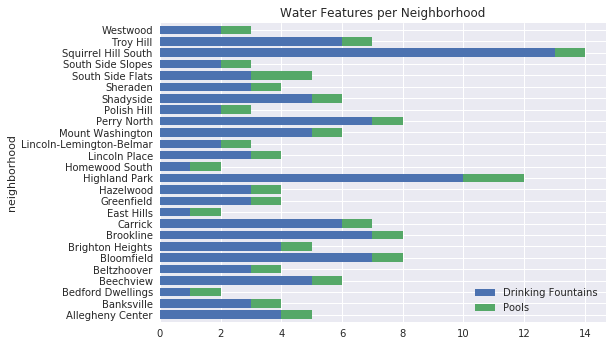

In [11]:
#plotting the dataset as a stacked horizontal bar graph
plt.style.use('seaborn')
water_features.plot.barh(title="Water Features per Neighborhood", width = 0.75, stacked =True)
plt.rcParams['figure.figsize']=(30,10)

---
## Final Rankings:

The below rankings are based off of the number of pools and fountains. The neighborhood with the most water features total is the best neighborhood. This ranking does not include neighborhoods without a pool. Neighborhoods with the same amount of water features are tied in this category.

In [6]:
#Creating a totals column 
water_features['Total'] = water_features['Pools']+water_features['Drinking Fountains']
#Sort by decending order
water_features.sort_values(['Total'], ascending=[False])

,Drinking Fountains,Pools,Total
neighborhood,,,
Squirrel Hill South,13,1,14
Highland Park,10,2,12
Bloomfield,7,1,8
Perry North,7,1,8
Brookline,7,1,8
Troy Hill,6,1,7
Carrick,6,1,7
Shadyside,5,1,6
Beechview,5,1,6


The Best Neighborhood in terms of the amount of pools and fountains is Squirrel Hill South with 13 drinking fountains and one pool. 
___

## Conclusion

##### April Rigot:
I personally do not agree with the results since there is a lot more to consider than swimming pools. Despite living in Pittsburgh my entire life, I cannot say that any neighborhood is the *best*. If I had to choose I would say Oakland is the best neighborhood because of all of the resturants, museums, and other sources of entertainment. I do not live on campus, but my opinions are still biased because I am a Pitt student and I love the campus.